<h1>Image Classifier<h1>

In this assignment, you will train and evaluate your own image classifier.

Completing this homework will give you practice

Working with image datasets
Training image classifiers
Evaluating image classifiers
Explaining your decisions and their possible consequences.
A famous image classification example is handwritten digits (called MNIST). For fun, we’ll remix that idea and classify handwritten letters. To keep it manageable, we’ll just work with the first 3 letters (a through c).

Try to make the best model you can, under the following constraints:

No more than 100 training images.
No more than 5 minutes compute time (on a Kaggle, Colab, or lab machine GPU) to train a model.
Only use models that are already built into fastai.

----Initialize-----

In [1]:
# fastai-specific stuff.
# Import fastai code.
from fastai.vision.all import *

# Set a seed so that the results are the same every time this is run.
set_seed(0, reproducible=True)

In [2]:
# Show what GPU we have.
if torch.cuda.is_available():
    print(torch.cuda.get_device_properties(0))
else:
    print("No CUDA.")

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12050MB, multi_processor_count=28)


In [3]:
# fastai-specific
path = untar_data("https://students.cs.calvin.edu/~sc77/images.zip")

In [4]:
set_seed(333)
image_files = get_image_files(path).sorted()

In [5]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

CHECK TO SEE IF IMAGE HAS BEEN LOADED BY CHECKING THE LEGNTH OF THE `image_files` using `len()`

In [6]:
len(image_files)

75

In [7]:
first_img = image_files[0]
last_img = image_files[-1]
print("First Image: {first}".format(first = first_img.name))
print("Last Image: {last}".format(last = last_img.name))

First Image: A_1.png
Last Image: c_9.png


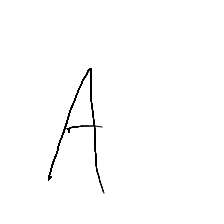

In [8]:
load_image(first_img)

In [9]:
def a_b_or_c(filename):
    return filename[0]
    
def get_y(file_path):
    return a_b_or_c(file_path.name)   

In [10]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [11]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [12]:
batch = dataloaders.train.one_batch()
images_orig, labels = batch
images = images_orig.clone() # make a copy that we can modify later.

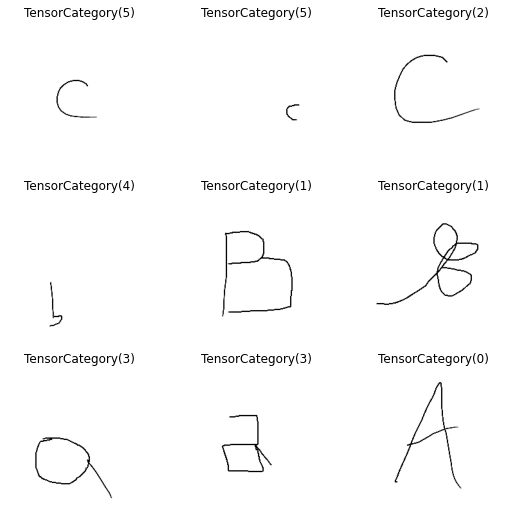

In [13]:
show_image_batch((images, labels))

In [14]:
print("{first_filename} is a {first}.".format(first_filename = first_img.name,first = a_b_or_c(first_img.name)))
print("{last_filename} is a {last}.".format(last_filename = last_img.name, last = a_b_or_c(last_img.name)))

A_1.png is a A.
c_9.png is a c.


In [15]:
labels

TensorCategory([5, 5, 2, 4, 1, 1, 3, 3, 0], device='cuda:0')

In [16]:
dataloaders.train.vocab

['A', 'B', 'C', 'a', 'b', 'c']

In [17]:
labels = []
for files in image_files:
    current_file = a_b_or_c(files.name)
    labels.append(current_file)

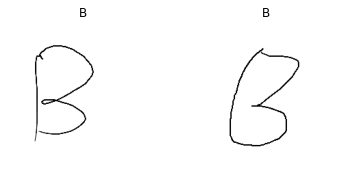

In [18]:
dataloaders = ImageDataLoaders.from_lists(
    # What images to use:
    path=path, fnames=image_files, labels=labels,

    # train-test split parameters:
    # - amount to hold out for validation:
    valid_pct=0.2,
    # - set the seed used for the train-test split (not the training)
    seed=42, 

    # Set batch size
    bs=2,

    # Make all the images the same size.
    item_tfms=Resize(224)
)

# Show what it did:
dataloaders.train.show_batch()

In [19]:
print(dataloaders.train.n, "training images")
print(dataloaders.valid.n, "validation images")

60 training images
15 validation images


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.317982,1.515794,0.466667,0.533333,00:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.501277,0.912442,0.733333,0.266667,00:01
1,2.183724,0.984211,0.666667,0.333333,00:01
2,1.790795,1.117764,0.666667,0.333333,00:01
3,1.833801,0.640478,0.800000,0.200000,00:01
4,1.739740,0.801591,0.733333,0.266667,00:01
5,1.672604,0.493766,0.933333,0.066667,00:01
6,1.525243,0.462535,0.866667,0.133333,00:01
7,1.423118,0.463987,0.800000,0.200000,00:01
8,1.415277,0.416571,0.800000,0.200000,00:01
9,1.603926,0.404030,0.933333,0.066667,00:01


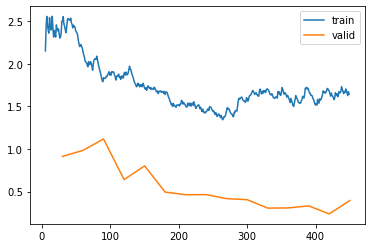

In [20]:
# fastai-specific
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=[accuracy, error_rate]
)
learn.fine_tune(epochs=15)
learn.recorder.plot_loss()

Evalutation: 

**1) How accurate is the classifier overall?**<br>
It is pretty accurate. It seems to classify each letters accordingly, except sometimes it makes mistakes while classifying small case and large case C's.    <br>(Please Look at Problem 5 for further details)

**2) Which letter is it most successful at classifying? Give an example of a correctly classified image (show a specific image file and its classification).**<br>
A is being classified most accurately, although it has some faults. 


Looking at File: /scratch/cs344/data/images/A/A_2.png.
This is a: A.


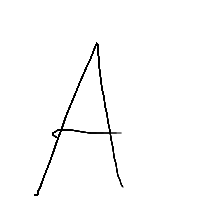

In [25]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(image_files[2]))
    print(f"\nLooking at File: {image_files[2]}.")
    print(f"This is a: {prediction}.")
load_image(image_files[2])

**3) What mistakes does it make most frequently? Give an example of a mistake (show a specific image file and its classification).**<br>
C's are making most mistakes.We can see from the results that file C_14 is being classified as a and C_15 is being classified as B 

Below is **a_10** being classified as **"c"**


Looking at File: /scratch/cs344/data/images/a/a_10.png.
This is a: c.


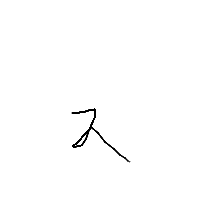

In [22]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(image_files[41]))
    print(f"\nLooking at File: {image_files[41]}.")
    print(f"This is a: {prediction}.")
load_image(image_files[41])

**4) For the previous 3 questions, any ideas about why?**<br>
This is happening because: <br>
1) I am lacking database amount<br>
2) handwriting images may be ambiguous and inconsistent<br>
As Machine learning is heavily based on database and its quality and amount, my test cases would not be as perfect as a machine learning that has twice the amount of data than mine. 

**5) Suppose someone else gave you one of their images. How likely do you think your classifier would be to get it right? report your answer in terms of a percentage, either overall or by letter.**


In [58]:
set_seed(30)
sample_images = random.sample(image_files, k=50)

In [59]:
correct = 0
for path in sample_images:
    with learn.no_bar():
        prediction, _, probs = learn.predict(PILImage.create(path))
    if prediction == a_b_or_c(path.name):
        correct +=1
correct / len(sample_images)


0.78

By looking at the accuracy shown above, I can say that if I was given a random image which is only limited to "A" "B" "C" "a" "b" "c" I will be able to answer what letter it is about 78% of the time. However It was seeded to show static answer for this questions. If it were random, It was showing 70-92 % range of accuracy. 

**6) What choices did you have to make in the process of collecting data, processing it, and analyzing the results?** <br>
I had to think about what if I collect letters with bad hand writing? How about Cursive? How about letters with exact same writing style just different size? (like the C's) I had to rename all data accordingly A,B,C,a,b,c and analyize each files and train my AI seperately with each catergorized letters. 

**6a) What are one or two choices that you could have made differently?**
<br> <br>
I think I could have used other people's actual hand writing to make it more vary, even though I tried to write it differently, I think it might not have been so natural. 
<br> <br>
I think I would have tried writing letters with different colors, location of the writing(different corners and so on) to see if it have any effects on the result.
<br> <br>
Also I am not too sure about this, I divided lower case and large case to better differentiate result because more varied data in a small amount of dataset would have made training more confusing.

**6b) What do you expect would be different if you made that different choice?**

<br> <br>
I think it would have created more accurate result for both difference I apply and test. <br><br>

1) Because it provides more variety in dataset<br>
2) Because It should cover some outliers in the dataset(appliance of option 2 from question above)